In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [2]:
df = pd.read_csv(r'/content/Shark Tank India.csv')

In [3]:
df.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Episode Title,Anchor,Industry,...,Invested Guest Name,All Guest Names,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Amit Present,Ashneer Present,Guest Present
0,1,BluePineFoods,1,1,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Food,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
1,1,BoozScooters,1,2,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Vehicles/Electrical Vehicles,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
2,1,HeartUpMySleeves,1,3,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Beauty/Fashion,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
3,1,TagzFoods,2,4,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Food,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
4,1,HeadAndHeart,2,5,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Education,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN


In [4]:
df.shape

(478, 78)

In [5]:
print(df['Season Number'].max(), "season \n")
print(df['Episode Number'].max(), "episodes \n")
print(df['Pitch Number'].max(), "startup companies came for pitching \n")
print(df['Episode Number'].value_counts().sort_values(ascending=True).unique(), "Pitches came per episodes \n")

3 season 

52 episodes 

478 startup companies came for pitching 

[ 3  5  6  7  8  9 10 11 31] Pitches came per episodes 



In [6]:
print(df['Industry'].value_counts())

Industry
Food                            107
Beauty/Fashion                   95
Manufacturing                    50
Technology/Software              49
Services                         39
Medical/Health                   37
Furnishing/Household             25
Vehicles/Electrical Vehicles     17
Liquor/Beverages                 15
Education                        11
Sports                           10
Animal/Pets                       6
Electronics                       5
Agriculture                       4
Entertainment                     3
Others                            3
Hardware                          2
Name: count, dtype: int64


In [16]:
tmp = df['Industry'].value_counts().sort_values(ascending=True).reset_index()
tmp.columns = ['Industry', 'count']
fig = px.bar(tmp, x='Industry', y='count', title="Industries that came in Shark Tank",
             color='Industry',
            #  template='simple_white',
             text='count')
fig.show()

In [13]:
print("Total Pitchers - ", int(df['Number of Presenters'].sum()), "\n")
print("Total Male Pitchers - ", int(df['Male Presenters'].sum()), "\n")
print("Total Female Pitchers - ", int(df['Female Presenters'].sum()), "\n")

print("Male entrepreneurs percentage - ", round(df['Male Presenters'].sum() / df['Number of Presenters'].sum() * 100, 2), "%\n")
print("Female entrepreneurs percentage - ", round(df['Female Presenters'].sum() / df['Number of Presenters'].sum() * 100, 2), "%\n")

print("Couple entrerpeneurs percentage - ", round(df.loc[df['Couple Presenters'] == 1]['Couple Presenters'].sum()/df['Number of Presenters'].sum()*100, 2), "% (data in complete)\n")

Total Pitchers -  966 

Total Male Pitchers -  692 

Total Female Pitchers -  271 

Male entrepreneurs percentage -  71.64 %

Female entrepreneurs percentage -  28.05 %

Couple entrerpeneurs percentage -  8.7 % (data in complete)



In [18]:
print(df.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

tempdf = df.sort_values(by='Yearly Revenue', ascending=False)[0:10]
fig = px.bar(tempdf, x='Startup Name', y = 'Yearly Revenue', title = 'Highest Revenue of the pitches',
             color = 'Startup Name',
             text = tempdf['Yearly Revenue'].map(int).map(str) + "%")
fig.show()

Startup Name
Refit          18700.0
FrenchCrown     7200.0
NasherMiles     5700.0
Rubans          5100.0
YesMadam        5000.0
BaccaBucci      4700.0
Toyshine        4500.0
LittleBox       3600.0
Zorko           3000.0
UrbanMonkey     2500.0
Name: Yearly Revenue, dtype: float64


In [19]:
print(df.groupby('Startup Name')['Gross Margin'].max().nlargest(10))

tempdf = df.sort_values(by='Gross Margin', ascending=False)[0:10]
fig = px.bar(tempdf, x='Startup Name', y = 'Gross Margin', title = 'Highest Gross Margin of the Brands',
             color = 'Startup Name',
             text = tempdf['Gross Margin'].map(int).map(str) + "%")
fig.show()

Startup Name
Poo-de-Cologne        150.0
Farda                 115.0
Cocofit                95.0
UnStop                 90.0
AvataarSkincare        87.0
EvaScalp               85.0
MidNightAngelsByPC     83.0
Auli                   80.0
KabaddiAdda            80.0
Lea                    80.0
Name: Gross Margin, dtype: float64


Received Offer
1    67%
0    33%
Name: proportion, dtype: object 



<Axes: xlabel='Received Offer', ylabel='count'>

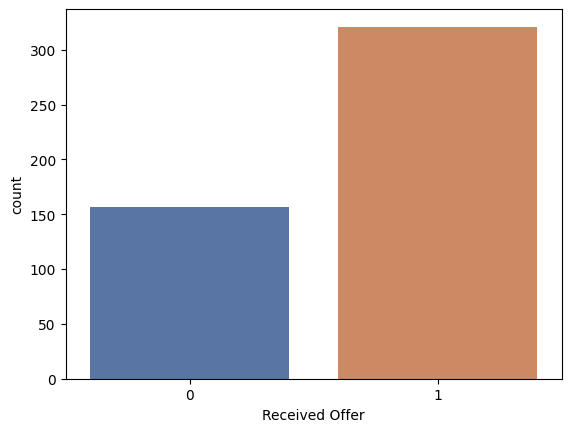

In [26]:
print(round(df['Received Offer'].value_counts(normalize = True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x = 'Received Offer', data = df, palette = 'deep')

Accepted Offer
1.0    83%
0.0    17%
Name: proportion, dtype: object 



<Axes: xlabel='Accepted Offer', ylabel='count'>

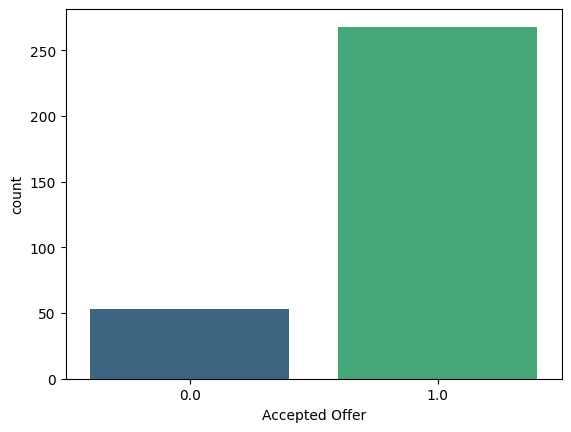

In [27]:
print(round(df['Accepted Offer'].value_counts(normalize = True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x = 'Accepted Offer', data = df, palette = 'viridis')

In [30]:
df.columns

Index(['Season Number', 'Startup Name', 'Episode Number', 'Pitch Number',
       'Season Start', 'Season End', 'Original Air Date', 'Episode Title',
       'Anchor', 'Industry', 'Business Description', 'Company Website',
       'Started in', 'Number of Presenters', 'Male Presenters',
       'Female Presenters', 'Transgender Presenters', 'Couple Presenters',
       'Pitchers Average Age', 'Pitchers City', 'Pitchers State',
       'Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Net Margin',
       'EBITDA', 'Cash Burn', 'SKUs', 'Has Patents', 'Bootstrapped',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Received Offer', 'Accepted Offer', 'Total Deal Amount',
       'Total Deal Equity', 'Total Deal Debt', 'Debt Interest',
       'Deal Valuation', 'Number of Sharks in Deal', 'Deal Has Conditions',
       'Royalty Deal', 'Advisory Shares Equity', 'Namita Investment Amount',
       'Namita Investment Equity', 'Namita Debt Amount',
       'Vineeta

In [31]:
print("Companies that rejected offers from Sharks \n")
df.loc[df['Accepted Offer']==0, ["Startup Name", "Original Ask Amount", "Original Offered Equity", "Valuation Requested"]]

Companies that rejected offers from Sharks 



,Startup Name,Original Ask Amount,Original Offered Equity,Valuation Requested
6,qZenseLabs,100.0,0.25,40000.000000
19,Torch-it,75.0,1.00,7500.000000
21,LaKheerDeli,50.0,7.50,667.000000
27,KabiraHandmad,100.0,5.00,2000.000000
41,MorrikoPureFoods,100.0,3.00,3333.000000
55,IndiaHempandCo,50.0,4.00,1250.000000
60,KetoIndia,150.0,1.25,12000.000000
70,Moonshine,80.0,0.50,16000.000000
71,Falhari,50.0,2.00,2500.000000
73,UrbanMonkey,100.0,1.00,10000.000000


Ashneer

Industry
Food                            8
Vehicles/Electrical Vehicles    3
Education                       3
Manufacturing                   2
Beauty/Fashion                  2
Animal/Pets                     1
Sports                          1
Technology/Software             1
Name: count, dtype: int64


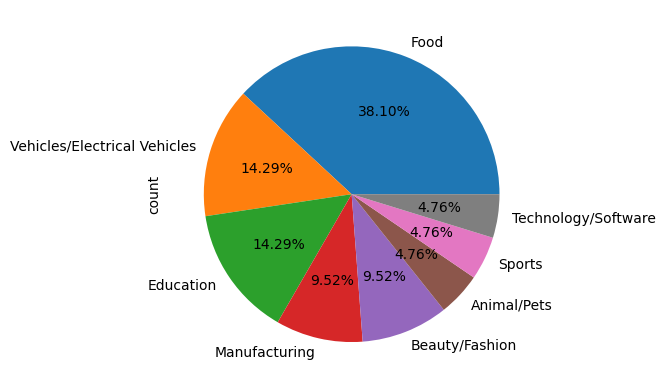

In [35]:
print(df[df['Ashneer Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False))
df[df['Ashneer Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False).plot.pie(autopct = '%1.2f%%')
plt.show()

tmpdf = df.loc[df['Ashneer Investment Amount'] > 0][['Startup Name', 'Ashneer Investment Amount', 'Ashneer Investment Equity']].sort_values(by = 'Ashneer Investment Equity')
fig = px.bar(tmpdf, x = 'Ashneer Investment Equity', y = 'Ashneer Investment Amount', color = 'Startup Name',
             title = 'Total Equity received by Ashneer (in %) for investment (in lakhs)', text = tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type = 'category')))
fig.show()

Namita

Industry
Beauty/Fashion          18
Medical/Health          18
Food                    14
Manufacturing           10
Technology/Software      8
Services                 7
Furnishing/Household     5
Education                4
Sports                   2
Animal/Pets              1
Entertainment            1
Agriculture              1
Name: count, dtype: int64


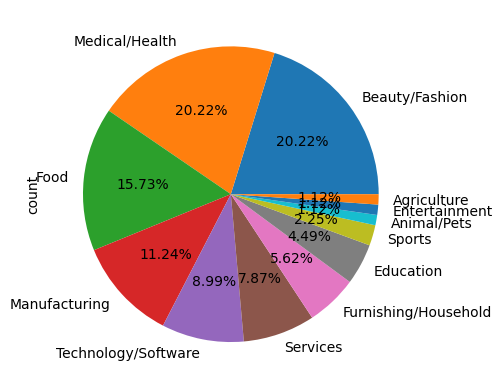

In [36]:
print(df[df['Namita Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False))
df[df['Namita Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False).plot.pie(autopct = '%1.2f%%')
plt.show()

tmpdf = df.loc[df['Namita Investment Amount'] > 0][['Startup Name', 'Namita Investment Amount', 'Namita Investment Equity']].sort_values(by = 'Namita Investment Equity')
fig = px.bar(tmpdf, x = 'Namita Investment Equity', y = 'Namita Investment Amount', color = 'Startup Name',
             title = 'Total Equity received by Namita (in %) for investment (in lakhs)', text = tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type = 'category')))
fig.show()


Peeyush

Industry
Medical/Health                  13
Manufacturing                   13
Food                            13
Beauty/Fashion                  12
Technology/Software             10
Services                         9
Sports                           4
Education                        3
Agriculture                      3
Liquor/Beverages                 2
Furnishing/Household             2
Animal/Pets                      1
Hardware                         1
Entertainment                    1
Vehicles/Electrical Vehicles     1
Name: count, dtype: int64


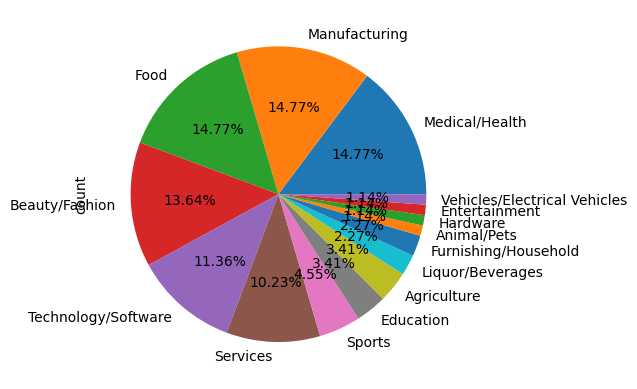

In [52]:
print(df[df['Peyush Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False))
df[df['Peyush Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False).plot.pie(autopct = '%1.2f%%')
plt.show()

tmpdf = df.loc[df['Peyush Investment Amount'] > 0][['Startup Name', 'Peyush Investment Amount', 'Peyush Investment Equity']].sort_values(by = 'Peyush Investment Equity')
fig = px.bar(tmpdf, x = 'Peyush Investment Equity', y = 'Peyush Investment Amount', color = 'Startup Name',
             title = 'Total Equity received by Peyush (in %) for investment (in lakhs)', text = tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type = 'category')))
fig.show()


Vineeta

Industry
Food                            23
Beauty/Fashion                  20
Manufacturing                    4
Vehicles/Electrical Vehicles     3
Medical/Health                   3
Liquor/Beverages                 3
Furnishing/Household             3
Technology/Software              3
Sports                           2
Electronics                      2
Services                         2
Name: count, dtype: int64


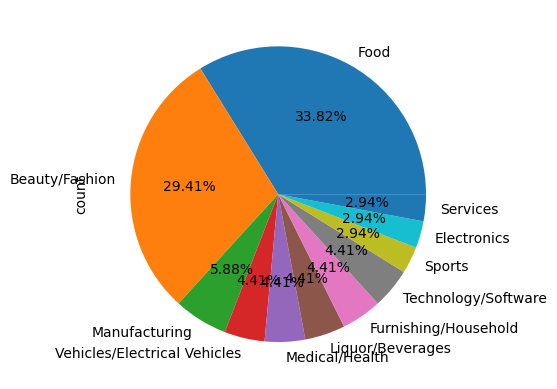

In [37]:
print(df[df['Vineeta Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False))
df[df['Vineeta Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False).plot.pie(autopct = '%1.2f%%')
plt.show()

tmpdf = df.loc[df['Vineeta Investment Amount'] > 0][['Startup Name', 'Vineeta Investment Amount', 'Vineeta Investment Equity']].sort_values(by = 'Vineeta Investment Equity')
fig = px.bar(tmpdf, x = 'Vineeta Investment Equity', y = 'Vineeta Investment Amount', color = 'Startup Name',
             title = 'Total Equity received by Vineeta (in %) for investment (in lakhs)', text = tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type = 'category')))
fig.show()


Anupam

Industry
Beauty/Fashion                  16
Food                            16
Medical/Health                  11
Manufacturing                   11
Technology/Software              5
Furnishing/Household             3
Vehicles/Electrical Vehicles     2
Education                        2
Electronics                      2
Liquor/Beverages                 2
Services                         2
Animal/Pets                      1
Sports                           1
Name: count, dtype: int64


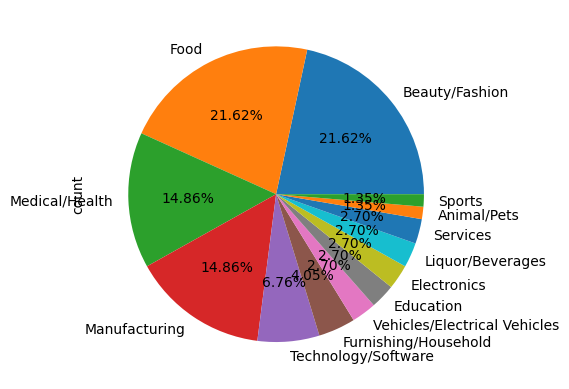

In [38]:
print(df[df['Anupam Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False))
df[df['Anupam Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False).plot.pie(autopct = '%1.2f%%')
plt.show()

tmpdf = df.loc[df['Anupam Investment Amount'] > 0][['Startup Name', 'Anupam Investment Amount', 'Anupam Investment Equity']].sort_values(by = 'Anupam Investment Equity')
fig = px.bar(tmpdf, x = 'Anupam Investment Equity', y = 'Anupam Investment Amount', color = 'Startup Name',
             title = 'Total Equity received by Anupam (in %) for investment (in lakhs)', text = tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type = 'category')))
fig.show()


Industry
Food                            10
Beauty/Fashion                   8
Medical/Health                   4
Furnishing/Household             3
Services                         3
Technology/Software              3
Manufacturing                    1
Vehicles/Electrical Vehicles     1
Electronics                      1
Others                           1
Name: count, dtype: int64


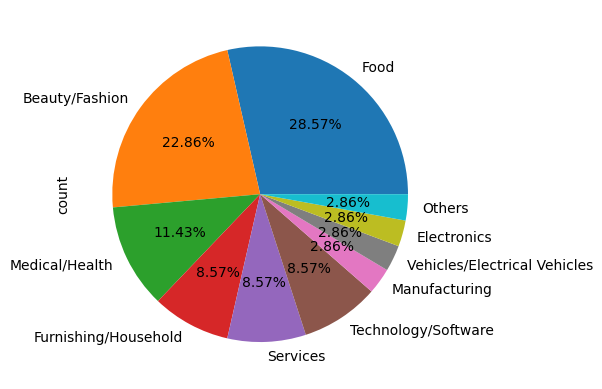

In [39]:
print(df[df['Amit Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False))
df[df['Amit Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False).plot.pie(autopct = '%1.2f%%')
plt.show()

tmpdf = df.loc[df['Amit Investment Amount'] > 0][['Startup Name', 'Amit Investment Amount', 'Amit Investment Equity']].sort_values(by = 'Amit Investment Equity')
fig = px.bar(tmpdf, x = 'Amit Investment Equity', y = 'Amit Investment Amount', color = 'Startup Name',
             title = 'Total Equity received by Amit (in %) for investment (in lakhs)', text = tmpdf['Amit Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type = 'category')))
fig.show()


Aman

Industry
Food                            22
Beauty/Fashion                  22
Technology/Software             14
Medical/Health                  13
Manufacturing                    9
Services                         8
Liquor/Beverages                 4
Vehicles/Electrical Vehicles     3
Education                        3
Furnishing/Household             3
Sports                           2
Others                           2
Electronics                      1
Animal/Pets                      1
Entertainment                    1
Name: count, dtype: int64


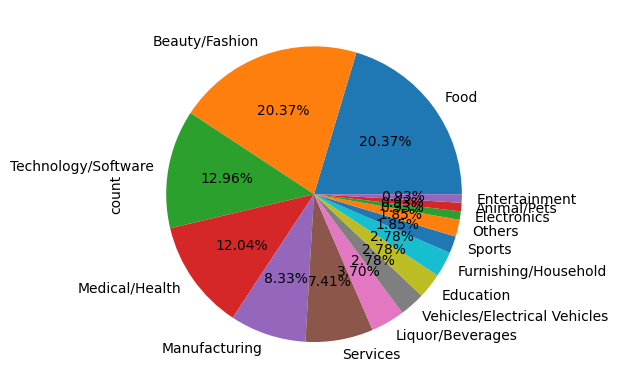

In [40]:
print(df[df['Aman Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False))
df[df['Aman Investment Amount'] > 0]['Industry'].value_counts().sort_values(ascending = False).plot.pie(autopct = '%1.2f%%')
plt.show()

tmpdf = df.loc[df['Aman Investment Amount'] > 0][['Startup Name', 'Aman Investment Amount', 'Aman Investment Equity']].sort_values(by = 'Aman Investment Equity')
fig = px.bar(tmpdf, x = 'Aman Investment Equity', y = 'Aman Investment Amount', color = 'Startup Name',
             title = 'Total Equity received by Aman (in %) for investment (in lakhs)', text = tmpdf['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type = 'category')))
fig.show()


Number of Sharks in a Deal

Number of Sharks in Deal
1.0    43%
2.0    31%
3.0    14%
4.0     7%
5.0     5%
Name: proportion, dtype: object


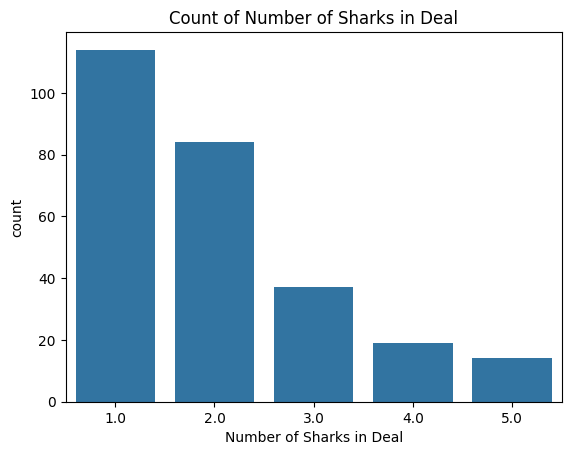

The deals where more than or equals to 5 sharks are involved:
           Startup Name  Total Deal Amount  Total Deal Equity
15        SkippiIcePops           100.0000               15.0
50   FindYourKicksIndia            50.0000               25.0
64               INACAN           100.0000               10.0
80   SunfoxTechnologies           100.0000                6.0
209              Snitch           150.0000                1.5
239            Mahantam            30.0000               20.0
274         Pharmallama           200.0000                5.0
311           Sahayatha           100.0000               10.0
357            JewelBox           200.0000                6.0
365         NasherMiles           300.0000                1.5
423           LittleBox            75.0000                2.5
435           Dharaksha             0.0125                1.0
469                PTal           100.0000                3.2
476           Canvaloop           200.0000                4.0


In [49]:
# Calculate and print the percentage of each count of 'Number of sharks in deal'
print(round(df['Number of Sharks in Deal'].value_counts(normalize = True)*100).astype(str).str.replace('.0', '%'))

# Plot the count of 'Number of sharks in deal'
sns.countplot(data=df, x='Number of Sharks in Deal')
plt.title('Count of Number of Sharks in Deal')
plt.show()

# Print the deals where more than or equal to 5 sharks are involved
print('The deals where more than or equals to 5 sharks are involved:')
print(df.loc[df['Number of Sharks in Deal'] >= 5][['Startup Name', 'Total Deal Amount', 'Total Deal Equity']])

In [50]:
print(format_currency(df['Total Deal Amount'].sum()/100, 'INR', locale = 'en_IN').replace('.00', ''), "crores")

₹177.36 crores


Total Debt amount received by sharks

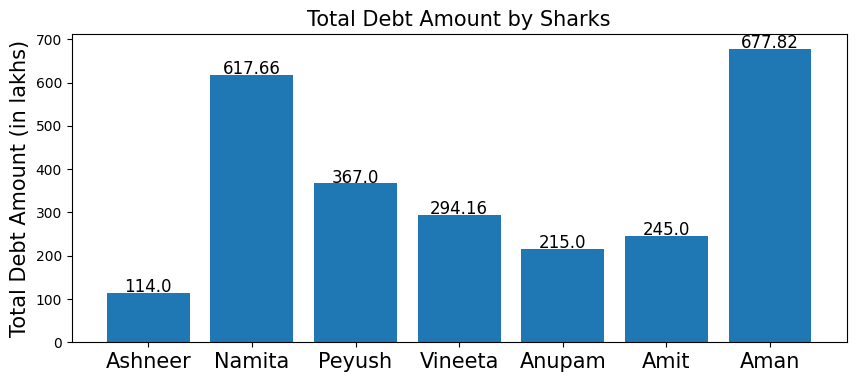

In [57]:
Amount = [df['Ashneer Debt Amount'].sum(), df['Namita Debt Amount'].sum(), df['Peyush Debt Amount'].sum(), df['Vineeta Debt Amount'].sum(), df['Anupam Debt Amount'].sum(), df['Amit Debt Amount'].sum(), df['Aman Debt Amount'].sum()]

name = ['Ashneer', 'Namita', 'Peyush', 'Vineeta', 'Anupam', 'Amit', 'Aman']
df2 = {'Name': name, 'Total Amount': Amount}
plt.figure(figsize = (10, 4))
plt.bar(df2['Name'], df2['Total Amount'])
plt.xticks(fontsize = 15)
plt.ylabel("Total Debt Amount (in lakhs)", fontsize = 15)
for index, d in enumerate(Amount):
  plt.text(x = index, y = d+2, s = f'{round(d, 2)}', ha = 'center', fontdict = dict(fontsize = 12))
plt.title("Total Debt Amount by Sharks", fontsize = 15)
plt.show()

Total Equity Received by sharks

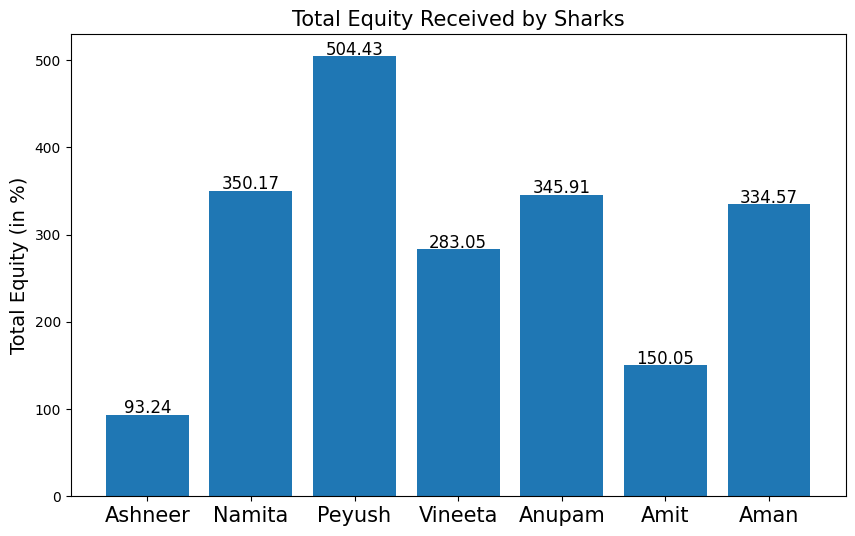

In [60]:
Equity = [df['Ashneer Investment Equity'].sum(), df['Namita Investment Equity'].sum(), df['Peyush Investment Equity'].sum(), df['Vineeta Investment Equity'].sum(), df['Anupam Investment Equity'].sum(), df['Amit Investment Equity'].sum(), df['Aman Investment Equity'].sum()]

df3 = {'Name': name, 'Total Equity': Equity}
plt.figure(figsize = (10, 6))
plt.bar(df3['Name'], df3['Total Equity'])
plt.xticks(fontsize = 15)
plt.ylabel("Total Equity (in %)", fontsize = 14)
for index, d in enumerate(Equity):
  plt.text(x = index, y = d+2, s = f'{round(d, 2)}', ha = 'center', fontdict = dict(fontsize = 12))
plt.title("Total Equity Received by Sharks", fontsize = 15)
plt.show()

Companies who got the same valuation as they requested

In [73]:
df.loc[df['Valuation Requested'] == df['Deal Valuation']][['Startup Name', 'Valuation Requested', 'Deal Valuation']]

,Startup Name,Valuation Requested,Deal Valuation
20,Kavach,50.00,50.00
22,BeyondSnack,2000.00,2000.00
45,Cocofit,0.00,0.00
86,WattTechnovations,0.00,0.00
171,TheSimplySalad,300.00,300.00
185,Janitri,4000.00,4000.00
203,NeoMotion,10000.00,10000.00
219,PadCare,2500.00,2500.00
223,Geeani,1000.00,1000.00
240,MindPeers,5300.00,5300.00


Some companies were on pre-revenue or didn't have any revenue (as of pitching day)

In [74]:
df4 = df.loc[df['Yearly Revenue'] == 0]
print(df4['Startup Name'])

9                   CosIQ
23     VivalyfInnovations
24           MotionBreeze
42          GoodGoodPiggy
77             KGAgrotech
83        JulaaAutomation
98               Scholify
100            Sabjikothi
114               On2Cook
131             Scintiglo
205              Sayonara
206                   PMV
257               CureSee
264             HoloKitab
277                  Hood
295             WaggyZone
350                Vecros
415                  Rize
451             Xmachines
455               Prorata
457         AlienVersions
460               Melooha
475          CoolTheGlobe
Name: Startup Name, dtype: object
